Let's try to read the data into a list first

In [112]:
import csv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

X_train = []
y_train = []
X_test = []
y_test = []

with open('DATA/Digits/X_train.csv', 'rb') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        X_train.append([float(x.strip()) for x in row[0].split(',')])
        
with open('DATA/Digits/y_train.csv', 'rb') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        y_train.append(np.float(row[0]))
        

with open('DATA/Digits/X_test.csv', 'rb') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        X_test.append([float(x.strip()) for x in row[0].split(',')])
        
with open('DATA/Digits/y_test.csv', 'rb') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        y_test.append(np.float(row[0]))

Lets convert this list into an array now

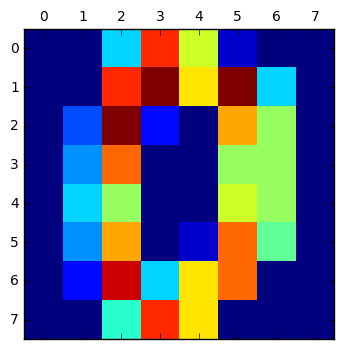

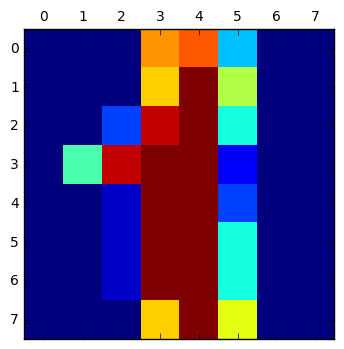

In [113]:
len(X_train[0])
plt.matshow(np.reshape(X_train[0],[8,8]))
plt.matshow(np.reshape(X_train[1],[8,8]))

In [134]:
np.array(X_train).shape

(898, 64)

In [114]:
y_hot = np.zeros([len(y_train),10])
for i in xrange(len(y_train)):
    y_hot[i,int(y_train[i])] = 1


yt_hot = np.zeros([len(y_test),10])
for i in xrange(len(y_test)):
    yt_hot[i,int(y_test[i])] = 1

In [115]:
X = np.array(X_train)
y = np.array(y_train)
y = [int(yy) for yy in y]

Xt = np.array(X_test)
yt = np.array(y_test)
yt = [int(yy) for yy in yt]


Lets try to visualizze our data as a scatter plot

In [116]:
num_data = len(X) 
inputs = 64
outputs = 10

# lets define a learning alpha and regularization beta
alpha = 0.02  ## learning rate
beta = 0  ## regularization term weight

This calculates total dataset loss

In [129]:

def calc_total_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    data_loss = - np.sum(y_hot*np.log(probs))/num_data
    reg_loss = 0.5*beta*np.sum(W1*W1) + 0.5*beta*np.sum(W2*W2)
    loss = data_loss + reg_loss
    print(loss)
    return  loss

In [130]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

Actual method to predict probability (between 0 and 1)

In [131]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in xrange(0, 20):
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        #print(delta3)
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1 == 0:
          print "Loss after iteration %i: %f" %(i, calculate_loss(model))
    
    return model

In [137]:
# Build a model with a 3-dimensional hidden layer
model = construct_model(12, print_loss=True)

predict(model, X)

3.235730212
Loss after iteration 0: 3.235730
[0 2 5 6 7 8]
13.3779550405
Loss after iteration 1: 13.377955
[1 4 6]
22.5908501182
Loss after iteration 2: 22.590850
[0 5]
34.7252100739
Loss after iteration 3: 34.725210
[3 7]
51.632731956
Loss after iteration 4: 51.632732
[4 6]


array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6,

##### 